In [2]:
!unzip -o /content/dataset.zip -d /content


เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: /content/dataset/train/5/00005_00053_00015.png  
  inflating: /content/dataset/train/5/00005_00053_00016.png  
  inflating: /content/dataset/train/5/00005_00053_00017.png  
  inflating: /content/dataset/train/5/00005_00053_00018.png  
  inflating: /content/dataset/train/5/00005_00053_00019.png  
  inflating: /content/dataset/train/5/00005_00053_00020.png  
  inflating: /content/dataset/train/5/00005_00053_00021.png  
  inflating: /content/dataset/train/5/00005_00053_00022.png  
  inflating: /content/dataset/train/5/00005_00053_00023.png  
  inflating: /content/dataset/train/5/00005_00053_00024.png  
  inflating: /content/dataset/train/5/00005_00053_00025.png  
  inflating: /content/dataset/train/5/00005_00053_00026.png  
  inflating: /content/dataset/train/5/00005_00053_00027.png  
  inflating: /content/dataset/train/5/00005_00053_00028.png  
  inflating: /content/dataset/train/5/00005_00053_00029.png  
  inflating: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns


In [4]:
def load_data(data_path):
    images = []
    labels = []

    for class_id in range(43):
        class_path = os.path.join(data_path, str(class_id))
        if not os.path.exists(class_path):
            print("Missing:", class_path)
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.resize(img, (30, 30))
            images.append(img)
            labels.append(class_id)

    return np.array(images), np.array(labels)


In [5]:
X, Y = load_data("/content/dataset/train")

X = X.astype("float32") / 255.0

print("Loaded images:", X.shape)

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


Loaded images: (39209, 30, 30, 3)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 339,019 (1.29 MB)

 Trainable params: 339,019 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, Y_train,
    epochs=40,
    batch_size=32,
    validation_data=(X_val, Y_val)
)


Epoch 1/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3971 - loss: 2.2156 - val_accuracy: 0.9551 - val_loss: 0.1733
Epoch 2/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9199 - loss: 0.2668 - val_accuracy: 0.9848 - val_loss: 0.0557
Epoch 3/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9578 - loss: 0.1395 - val_accuracy: 0.9888 - val_loss: 0.0389
Epoch 4/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9662 - loss: 0.1105 - val_accuracy: 0.9950 - val_loss: 0.0225
Epoch 5/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9769 - loss: 0.0762 - val_accuracy: 0.9944 - val_loss: 0.0213
Epoch 6/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9771 - loss: 0.0768 - val_accuracy: 0.9953 - val_loss: 0.0172
Epoch 7/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9799 - loss: 0.0641 - val_accuracy: 0.9952 - val_loss: 0.0183
Epoch 8/40
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9842 - loss: 0.0525 - val_accuracy: 

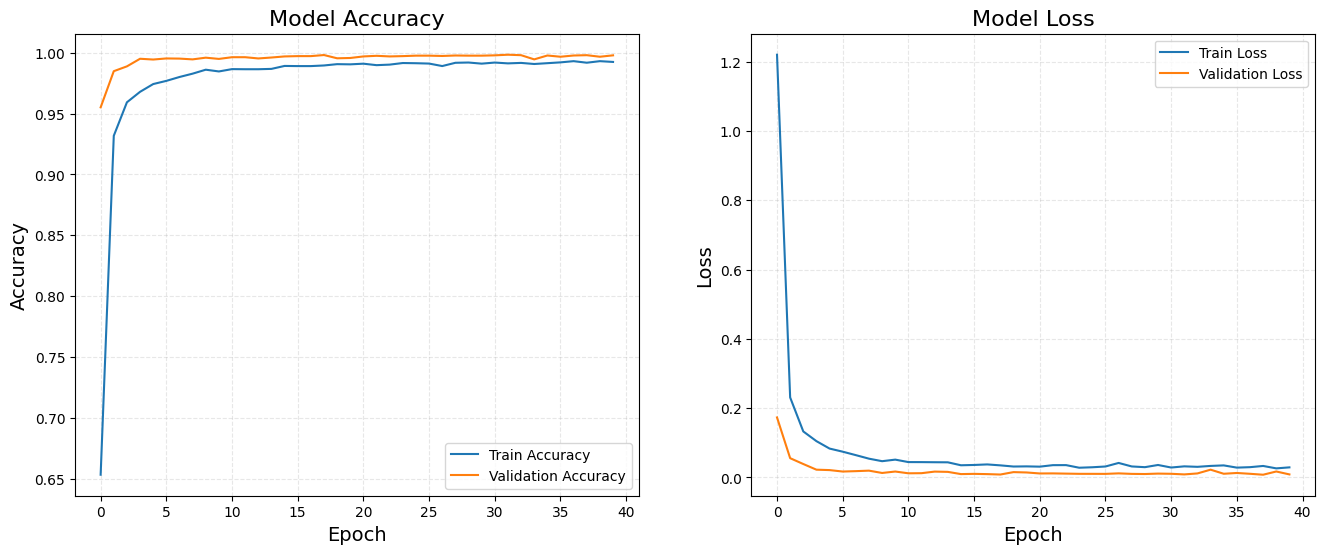

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# ---- Accuracy ----
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# ---- Loss ----
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0076
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


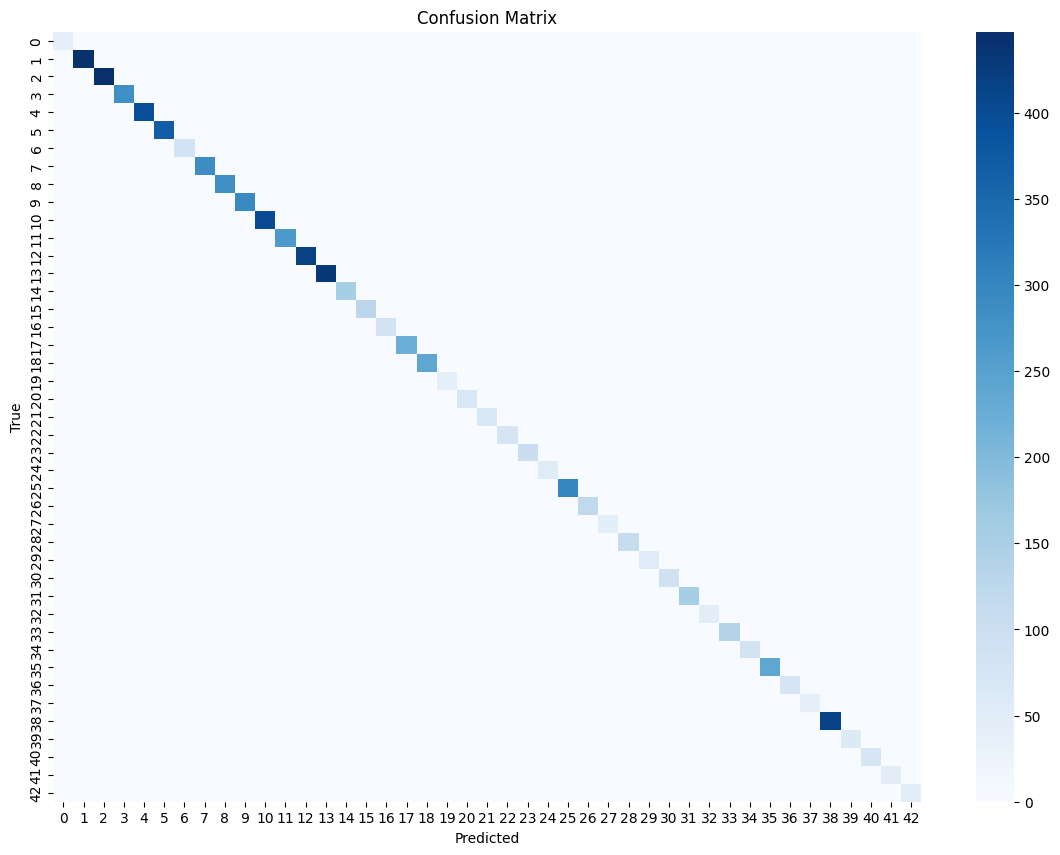

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00       444
           2       1.00      0.99      1.00       450
           3       1.00      1.00      1.00       282
           4       1.00      1.00      1.00       396
           5       0.99      0.99      0.99       372
           6       1.00      1.00      1.00        84
           7       1.00      1.00      1.00       288
           8       1.00      1.00      1.00       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       0.99      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       0.99      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       0.98      1.00      0.99       126
          16       1.00      1.00      1.00        84
          17       1.00    

In [9]:
model.evaluate(X_val, Y_val)

y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(Y_val, y_pred)

plt.figure(figsize=(14, 10))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(Y_val, y_pred))


In [ ]:
model.save("traffic_sign_model.h5")
print("✔ Model saved!")


✔ Model saved!
